In [4]:
import disaggregate
from __future__ import print_function, division
import itertools
from copy import deepcopy
from collections import OrderedDict
from warnings import warn
from datetime import datetime
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from six import iteritems
from builtins import range
from disaggregate import fhmm_exact
%matplotlib inline

def convert_to_datetime(x):
    return datetime.fromtimestamp(x)

def resample_data(df,resample_freq):
    avg_df = df.resample(resample_freq).mean()
    return avg_df


In [6]:
data_ref=pd.read_csv('challkere_day.csv')
from datetime import datetime
def convert_to_datetime(x):
    return datetime.fromtimestamp(x)
data_ref['date'] = data_ref['TIME in UTC seconds'].apply(convert_to_datetime)

In [7]:
data_ref

,Unnamed: 0,Rract_pwr(kVAr),E_react (kVArh),Rvolt (V),Bact_pwr(kW),Yvolt (V),Yapt_pwr(KVA),EA,R_THD_V,Ract_pwr(kW),...,B_THD_A,Rcurrent (A),Yract_pwr(kVAr),B_THD_V,Bcurrent (A),Rapt_pwr(KVA),Bpwr_fct,Ypwr_fct,TIME in UTC seconds,date
0,0,-0.0036,73,231,0.0143,230,0.2133,474,2.73,0.0393,...,0.000000,0.1712,0.0000,3.32,0.0625,0.0395,99,-99,1531394399,2018-07-12 16:49:59
1,1,-0.0025,73,231,0.0141,230,0.1990,474,3.02,0.0379,...,0.000000,0.1647,0.0019,3.32,0.0618,0.0380,99,99,1531394280,2018-07-12 16:48:00
2,2,-0.0033,73,231,0.0144,230,0.2074,474,2.95,0.0398,...,0.000000,0.1731,-0.0007,3.32,0.0631,0.0399,99,-99,1531394160,2018-07-12 16:46:00
3,3,-0.0039,73,231,0.0142,230,0.1921,474,2.73,0.0397,...,0.000000,0.1729,0.0046,3.32,0.0623,0.0399,99,99,1531394040,2018-07-12 16:44:00
4,4,-0.0042,73,231,0.0142,230,0.1990,474,2.73,0.0402,...,0.000000,0.1754,0.0023,3.32,0.0624,0.0405,99,99,1531393920,2018-07-12 16:42:00
5,5,-0.0036,73,231,0.0144,230,0.1996,474,2.73,0.0402,...,0.000000,0.1747,0.0026,3.32,0.0629,0.0403,99,99,1531393800,2018-07-12 16:40:00
6,6,-0.0038,73,231,0.0142,230,0.1993,474,2.73,0.0406,...,0.000000,0.1767,0.0023,3.32,0.0624,0.0408,99,99,1531393680,2018-07-12 16:38:00
7,7,-0.0035,73,231,0.0144,230,0.1922,474,2.73,0.0404,...,0.000000,0.1758,0.0043,3.32,0.0632,0.0406,99,99,1531393560,2018-07-12 16:36:00
8,8,-0.0035,73,231,0.0143,230,0.1926,474,2.73,0.0399,...,0.000000,0.1734,0.0049,3.34,0.0627,0.0400,99,99,1531393440,2018-07-12 16:34:00
9,9,-0.0032,73,231,0.0142,230,0.2721,474,2.73,0.0405,...,0.000000,0.1759,0.0227,3.32,0.0624,0.0406,99,99,1531393320,2018-07-12 16:32:00


In [9]:
data_ref['total']=data_ref['Bact_pwr(kW)']+data_ref['Ract_pwr(kW)']+data_ref['Yact_pwr(kW)']

In [10]:
data_ref

,Unnamed: 0,Rract_pwr(kVAr),E_react (kVArh),Rvolt (V),Bact_pwr(kW),Yvolt (V),Yapt_pwr(KVA),EA,R_THD_V,Ract_pwr(kW),...,Rcurrent (A),Yract_pwr(kVAr),B_THD_V,Bcurrent (A),Rapt_pwr(KVA),Bpwr_fct,Ypwr_fct,TIME in UTC seconds,date,total
0,0,-0.0036,73,231,0.0143,230,0.2133,474,2.73,0.0393,...,0.1712,0.0000,3.32,0.0625,0.0395,99,-99,1531394399,2018-07-12 16:49:59,0.2669
1,1,-0.0025,73,231,0.0141,230,0.1990,474,3.02,0.0379,...,0.1647,0.0019,3.32,0.0618,0.0380,99,99,1531394280,2018-07-12 16:48:00,0.2510
2,2,-0.0033,73,231,0.0144,230,0.2074,474,2.95,0.0398,...,0.1731,-0.0007,3.32,0.0631,0.0399,99,-99,1531394160,2018-07-12 16:46:00,0.2616
3,3,-0.0039,73,231,0.0142,230,0.1921,474,2.73,0.0397,...,0.1729,0.0046,3.32,0.0623,0.0399,99,99,1531394040,2018-07-12 16:44:00,0.2460
4,4,-0.0042,73,231,0.0142,230,0.1990,474,2.73,0.0402,...,0.1754,0.0023,3.32,0.0624,0.0405,99,99,1531393920,2018-07-12 16:42:00,0.2534
5,5,-0.0036,73,231,0.0144,230,0.1996,474,2.73,0.0402,...,0.1747,0.0026,3.32,0.0629,0.0403,99,99,1531393800,2018-07-12 16:40:00,0.2542
6,6,-0.0038,73,231,0.0142,230,0.1993,474,2.73,0.0406,...,0.1767,0.0023,3.32,0.0624,0.0408,99,99,1531393680,2018-07-12 16:38:00,0.2541
7,7,-0.0035,73,231,0.0144,230,0.1922,474,2.73,0.0404,...,0.1758,0.0043,3.32,0.0632,0.0406,99,99,1531393560,2018-07-12 16:36:00,0.2469
8,8,-0.0035,73,231,0.0143,230,0.1926,474,2.73,0.0399,...,0.1734,0.0049,3.34,0.0627,0.0400,99,99,1531393440,2018-07-12 16:34:00,0.2468
9,9,-0.0032,73,231,0.0142,230,0.2721,474,2.73,0.0405,...,0.1759,0.0227,3.32,0.0624,0.0406,99,99,1531393320,2018-07-12 16:32:00,0.3249


In [11]:
data=data_ref['total']*1000

In [12]:
data

0        266.900003
1        251.000002
2        261.599993
3        246.000005
4        253.400000
5        254.199995
6        254.100008
7        246.900002
8        246.799998
9        324.900014
10       330.199992
11       331.199998
12      1693.699950
13      1928.700051
14      1938.299975
15      1942.899996
16      1698.899949
17      1850.800015
18      1666.700000
19      1340.000002
20      1285.999978
21       693.500007
22      1211.400013
23      1917.300010
24      1882.600044
25      1386.600009
26       997.199990
27       308.999989
28      1158.299987
29      1051.900024
           ...     
6355    1502.799988
6356     708.700009
6357     542.700000
6358     542.700000
6359     560.699992
6360     542.599991
6361     617.000006
6362     630.800009
6363     620.800003
6364     623.900004
6365     520.899989
6366     521.199990
6367     522.599995
6368     619.499989
6369     694.700010
6370     697.199993
6371     700.300001
6372     704.300005
6373    2258.700002


In [13]:
app_list=['refrigerator', 'guest_ac', 'guest_lightfans','microwave', 'living_ac', 'conf_lights', 'conferenceroom_AC', 'control_room']

In [14]:
total_power=OrderedDict()
for name in app_list:
    filename=name + '.csv'
    dataset = pd.read_csv(filename,names = ['unix_date','meter_reading'])
    dataset['date'] = dataset['unix_date'].apply(convert_to_datetime)
    dataset = dataset.drop('unix_date', axis = 1)
    total_power[name]=dataset['meter_reading']*1000

In [15]:
total_power

OrderedDict([('refrigerator', 0       116.0
              1       116.0
              2       116.0
              3       116.0
              4         0.0
              5         0.0
              6         0.0
              7         0.0
              8         0.0
              9         0.0
              10        0.0
              11        0.0
              12        0.0
              13      116.0
              14      116.0
              15      116.0
              16      116.0
              17      116.0
              18        0.0
              19        0.0
              20        0.0
              21        0.0
              22        0.0
              23        0.0
              24        0.0
              25        0.0
              26      116.0
              27      116.0
              28      116.0
              29      116.0
                      ...  
              5010    116.0
              5011    114.0
              5012      0.0
              5013      0.0
    

In [16]:
fhmm = fhmm_exact.FHMM()

In [17]:
fhmm.train(total_power)

Identifying number of hidden states for appliance refrigerator
Number of hidden states for appliance refrigerator: 3
Training model for appliance refrigerator with 3 hidden states
[  9.99999986e-01   0.00000000e+00   1.37404119e-08]
[[  7.01290091e-01   1.82525572e-01   1.16184337e-01]
 [  1.24886532e-01   8.75113396e-01   7.22413203e-08]
 [  2.01417199e-06   4.76355777e-01   5.23642209e-01]]
[[ 116.        ]
 [   0.        ]
 [ 113.62453074]]
[[[  7.21510805e-06]]

 [[  3.02297461e-06]]

 [[  3.83116710e-01]]]
Identifying number of hidden states for appliance guest_ac
Number of hidden states for appliance guest_ac: 3
Training model for appliance guest_ac with 3 hidden states
[ 0.  0.  1.]
[[  9.93239981e-01   5.31144375e-03   1.44857557e-03]
 [  5.36432722e-03   9.94188646e-01   4.47027268e-04]
 [  4.10396717e-03   2.73597811e-03   9.93160055e-01]]
[[  800.]
 [    0.]
 [ 1700.]]
[[[  4.82625483e-06]]

 [[  4.47027269e-06]]

 [[  1.36798906e-05]]]
Identifying number of hidden states fo

In [35]:
total_power=data[:83]

In [36]:
total_power

0      266.900003
1      251.000002
2      261.599993
3      246.000005
4      253.400000
5      254.199995
6      254.100008
7      246.900002
8      246.799998
9      324.900014
10     330.199992
11     331.199998
12    1693.699950
13    1928.700051
14    1938.299975
15    1942.899996
16    1698.899949
17    1850.800015
18    1666.700000
19    1340.000002
20    1285.999978
21     693.500007
22    1211.400013
23    1917.300010
24    1882.600044
25    1386.600009
26     997.199990
27     308.999989
28    1158.299987
29    1051.900024
         ...     
53     214.200008
54     213.299997
55     214.099996
56     388.200013
57     381.800010
58     316.699999
59    1566.899997
60    1562.200030
61    2764.999989
62    2827.299925
63    2553.199891
64    1264.599958
65    1266.899950
66    1813.599946
67    1625.400053
68    1231.999984
69     264.999987
70     270.399988
71    1019.000004
72    1022.699988
73    1089.200039
74    1090.899994
75    1088.499970
76    1076.699979
77    1087

In [37]:
total=total_power.reshape(-1,1)

/home/aman/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [38]:
df=pd.DataFrame(total)

In [39]:
result=fhmm.disaggregate_chunk(df)

In [40]:
result

,conf_lights,conferenceroom_AC,control_room,guest_ac,guest_lightfans,living_ac,microwave,refrigerator
0,0.0,0.0,180.0,1700.0,0.0,0.0,0.0,114.0
1,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
2,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
3,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
4,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
5,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
6,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
7,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
8,0.0,0.0,180.0,0.0,0.0,0.0,0.0,114.0
9,150.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0


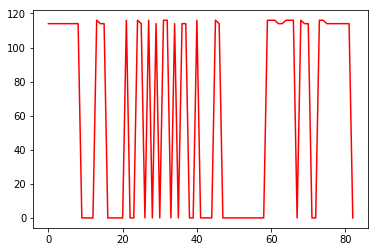

In [42]:
plt.plot(result['refrigerator'], 'r', label="Predicted")

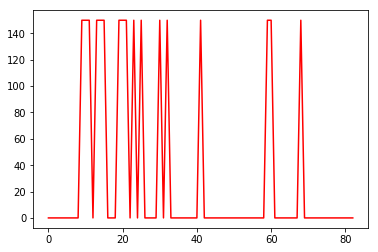

In [45]:
plt.plot(result['conf_lights'], 'r', label="Predicted")